In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
# check if tensorflow has cud
tf.test.is_built_with_cuda()

True

In [4]:
# Loading the data
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [29]:
X_test.shape

(10000, 32, 32, 3)

X_train contains 50000 data each with the size of 32 * 32 and its a RGB image

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train.shape

(50000, 1)

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

0 --> airplane </br>
1 --> automobile </br>
2 --> bird</br>
3 --> cat</br>
4 --> deer</br>
5 --> dog</br>
6 --> frog</br>
7 --> horse</br>
8 --> ship</br>
9 --> truck

In [15]:
# Function to show image
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

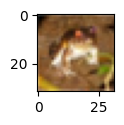

In [16]:
plot_sample(0)

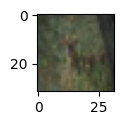

In [18]:
plot_sample(10)

In [22]:
target_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
target_classes[0]

'airplane'

In [23]:
y_train[0]

array([6], dtype=uint8)

In [24]:
target_classes[y_train[0][0]]

'frog'

In [34]:
# Scaling the values of X
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [26]:
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [27]:
# Converting the 'y' to categorical column  using one hot encoding

y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

## Model Building

In [32]:
from keras.src import optimizers
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

model.compile(optimizer = 'SGD',
    loss = "categorical_crossentropy",
    metrics =['accuracy']
)

# use "categorical_crossentropy" whenever one-hot-encoding is performed,
# in case of discrete values(0,1,2,..) use sparse cross entropy for calculating loss

model.fit(X_train_scaled, y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 204s 130ms/step - loss: 1.8089 - accuracy: 0.3572
Epoch 2/10
1563/1563 [==============================] - 203s 130ms/step - loss: 1.6204 - accuracy: 0.4298
Epoch 3/10
1563/1563 [==============================] - 202s 130ms/step - loss: 1.5374 - accuracy: 0.4593
Epoch 4/10
1563/1563 [==============================] - 204s 130ms/step - loss: 1.4779 - accuracy: 0.4806
Epoch 5/10
1563/1563 [==============================] - 205s 131ms/step - loss: 1.4293 - accuracy: 0.4971
Epoch 6/10
1563/1563 [==============================] - 205s 131ms/step - loss: 1.3839 - accuracy: 0.5135
Epoch 7/10
1563/1563 [==============================] - 205s 131ms/step - loss: 1.3454 - accuracy: 0.5270
Epoch 8/10
1563/1563 [==============================] - 206s 132ms/step - loss: 1.3094 - accuracy: 0.5403
Epoch 9/10
1563/1563 [==============================] - 204s 130ms/step - loss: 1.2754 - accuracy: 0.5530
Epoch 10/10
1563/1563 [=======================

In [35]:
model.predict(X_test_scaled)[1]

313/313 [==============================] - 12s 38ms/step


array([0.61837155, 0.9225056 , 0.40678322, 0.22019169, 0.22420698,
       0.06086764, 0.04114257, 0.04040448, 0.99413526, 0.9702921 ],
      dtype=float32)

In [37]:
target_classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 12s 38ms/step


'ship'

In [40]:
target_classes[y_test[1][0]]

'ship'

In [41]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 12s 38ms/step - loss: 1.4564 - accuracy: 0.4886


[1.4564168453216553, 0.4885999858379364]